# ECE 285 Assignment 1: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [2]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [3]:
# Import more utilies and the layers you have implemented
from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD
from ece285.utils.dataset import DataLoader
from ece285.utils.trainer import Trainer


## Visualize some examples from the dataset.

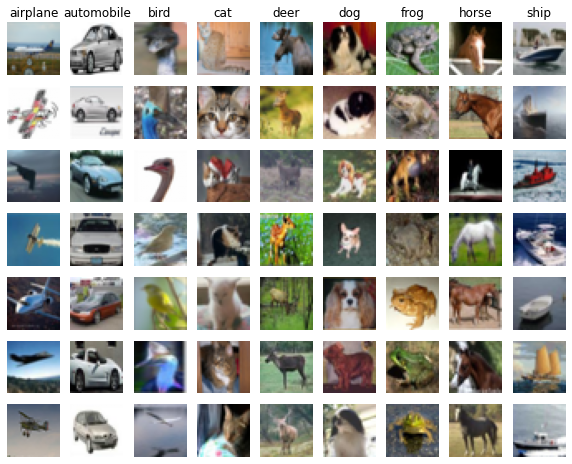

In [4]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [5]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [7]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [8]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302544
Validate Acc: 0.084
Epoch Average Loss: 2.302362
Epoch Average Loss: 2.302150
Epoch Average Loss: 2.301859
Validate Acc: 0.088
Epoch Average Loss: 2.301443
Epoch Average Loss: 2.300833
Epoch Average Loss: 2.299980
Validate Acc: 0.104
Epoch Average Loss: 2.298839
Epoch Average Loss: 2.297361
Epoch Average Loss: 2.295575
Validate Acc: 0.100
Epoch Average Loss: 2.293416
Epoch Average Loss: 2.290923
Epoch Average Loss: 2.287891
Validate Acc: 0.084
Epoch Average Loss: 2.284043
Epoch Average Loss: 2.279058
Epoch Average Loss: 2.272979
Validate Acc: 0.096
Epoch Average Loss: 2.265987
Epoch Average Loss: 2.258523
Epoch Average Loss: 2.250864
Validate Acc: 0.108
Epoch Average Loss: 2.243276
Epoch Average Loss: 2.235928
Epoch Average Loss: 2.228761
Validate Acc: 0.116
Epoch Average Loss: 2.222084
Epoch Average Loss: 2.215916
Epoch Average Loss: 2.210131
Validate Acc: 0.124
Epoch Average Loss: 2.204738
Epoch Average Loss: 2.200065
Epoch Average Loss: 2.195505
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [9]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.3438
Validation acc:  0.328


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

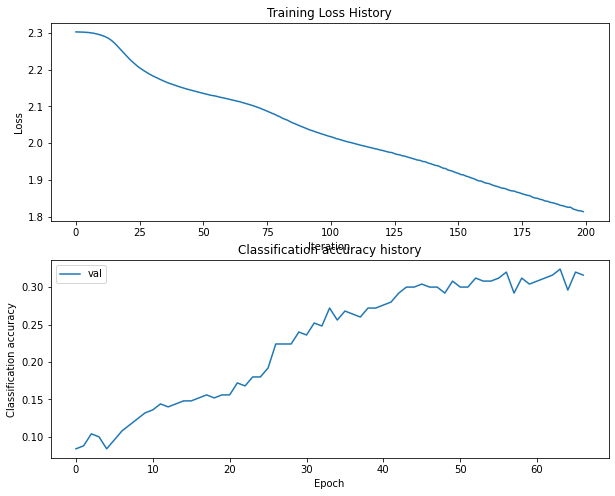

In [10]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


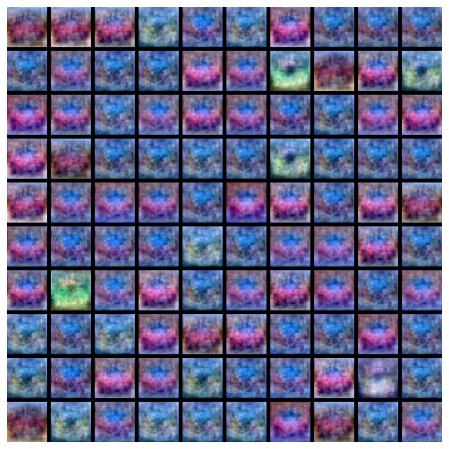

In [11]:
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:

I have tried varying the following hyperparameters.

Learning rate: It determines the step size when moving towards minimizing loss function. A lower learning rate result in slow learnign and requires higher number for iterations to get goood results. On the other hand, higher learning rate will result in oscillations in the training error and lack of convergence to the minima. Hence learning rate need to be tuned to get a result in between which is desirable.

Weight decay: In order to restrict overfitting of the model to the train data and result in bad performance of the model on test data, weight decay is introduced. This allows the weights to decay to zero and reduce the dimensionality of the model. Hence a higher weight will result in a more generic model and a lesser weight decay will result in model overfitting on the train data. Hence weight decay is tuned to get a result which is not overfitting, identifeid by validation curve not going down.

Epoch: It represents the number of cycles of model training done on a train data. It is always preferable to have a higher epoch for the model to train better on the train data. However, it might not be affordable to run the training indefinitely, and also it can obe observed after a point, there is not much improvement in the model trained. Hence is important to stop after a reasonable epoch with good results. The slop of the training loss curve at the end of epoch can tell us about the nature of training completion. If the curve is flattened, it represents that the training can be stopped.

Hidden layer: It is the layer that is neither input nor the output. The number of hidden layer plays a good role in feature extraction. This helps in identifying and seperating out relavant information from input necesary for making classification decision. The higher the number of hidden layers, higher number of features can be extracted and improve the classification accuracy. However higher hidden layers will result in overfitting of the model on the train data. Therefore an optimal number of hidden layer has to be choosen to get the required accuracy of validation.  


Tuning of the model is performed by observing the training loss and validation accuracy curves. A range of values are tested for each of the four hyperparameters. 

Learning rate was varried in [0.001, 0.05, 0.01, 0.1],
Weight decay was varied in [0, 0.001,0.005, 0.01, 0.1],
Epoch was varied in [50, 100, 200, 300, 500]
Hidden layer was varied in [50, 100, 150, 200]

The best hyperparameter obtained are: 
Learning rate = 0.05
Weight decay = 0.01 
Epoch = 500
Hidden layer = 150

In [44]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #

import time
best_val_acc = [0]
best_net_hyperparams = None

for lr in [0.05]: #[0.001, 0.05, 0.01, 0.1]:
    for weight_decay in [0.01]: #[0, 0.001,0.005, 0.01, 0.1]:
        for epoch in [500]: #[50, 100, 200, 300, 500]:
            for hidden_size in [150]: #[50, 100, 200, 300]:
                start_time = time.time()
                print(f"LR: {lr}, WD: {weight_decay}, Epoch: {epoch}, HS: {hidden_size}")
                net = init_model()
                optim = SGD(net, lr=lr, weight_decay=weight_decay)
                loss_func = CrossEntropyLoss()
                trainer = Trainer(
                    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
                )
                train_error, validation_accuracy = trainer.train()
                elapsed_time = time.time() - start_time
                if validation_accuracy[-1] > best_val_acc[-1]:
                    best_val_acc = validation_accuracy
                    best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
                    best_net = net
                    best_train_error = train_error

                print(f"LR: {lr}, WD: {weight_decay}, Epoch: {epoch}, HS: {hidden_size}, Time: {elapsed_time:.2f} seconds, Val Acc: {validation_accuracy}")

# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################
pass

LR: 0.05, WD: 0.01, Epoch: 500, HS: 150
Epoch Average Loss: 2.302116
Validate Acc: 0.084
Epoch Average Loss: 2.298464
Epoch Average Loss: 2.287053
Epoch Average Loss: 2.258332
Validate Acc: 0.112
Epoch Average Loss: 2.223569
Epoch Average Loss: 2.198284
Epoch Average Loss: 2.180000
Validate Acc: 0.136
Epoch Average Loss: 2.165033
Epoch Average Loss: 2.155220
Epoch Average Loss: 2.143401
Validate Acc: 0.156
Epoch Average Loss: 2.136076
Epoch Average Loss: 2.128399
Epoch Average Loss: 2.121141
Validate Acc: 0.172
Epoch Average Loss: 2.113604
Epoch Average Loss: 2.101217
Epoch Average Loss: 2.090946
Validate Acc: 0.228
Epoch Average Loss: 2.072228
Epoch Average Loss: 2.060511
Epoch Average Loss: 2.048594
Validate Acc: 0.228
Epoch Average Loss: 2.039833
Epoch Average Loss: 2.027638
Epoch Average Loss: 2.015571
Validate Acc: 0.260
Epoch Average Loss: 2.015017
Epoch Average Loss: 1.993745
Epoch Average Loss: 1.980447
Validate Acc: 0.280
Epoch Average Loss: 1.967596
Epoch Average Loss: 1.9955

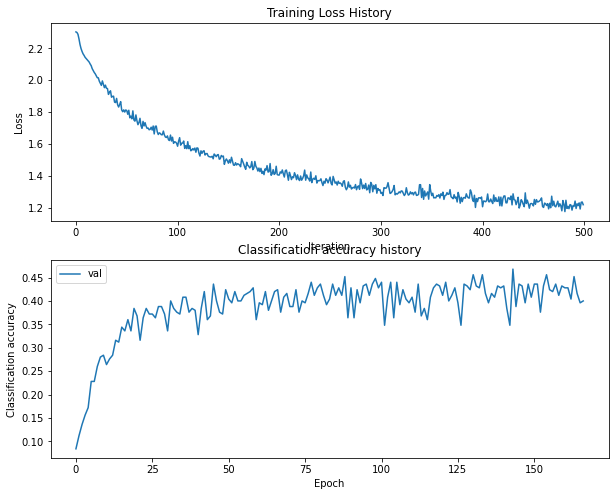

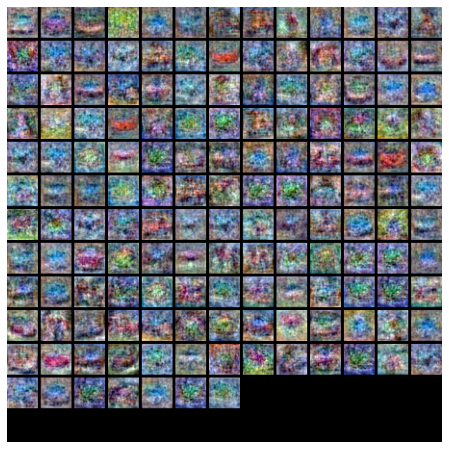

In [45]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(best_val_acc, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()

# TODO: visualize the weights of the best network (5%)
show_net_weights(best_net)

# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [46]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)


Test accuracy:  0.404


#### Inline Question (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

#### Your Answer: 

1. Train on a larger dataset.
3. Increase the regularization strength.


#### Your Explanation:

Training on larger datasets will expose the model to a larger variety of samples and help decrease the gap between training and testing accuracy

Adding more hidden layers increases the model complexity and is prone to overfit on the training data. Model will learn memmorize the training data rather than finding underlying patterns.

Increasing the regularization strength will prevent overfitting by reducing the large weights in the network or removing some completely and help generalizating the model. These techniques are made for removing overfitting of models on training data.